In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

c:\Users\emreg\miniconda3\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\emreg\miniconda3\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'c:\\Users\\emreg\\Downloads\\hockey-env-master\\hockey-env-master\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.13193582576608542,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [9]:
#env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [10]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [11]:
env.close()

# Train DEFENDING

In [12]:
# env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [13]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
-0.49186577294360745
-0.3525373230753195
-0.24069401573669297
-0.15129495362841283
-0.0663693463325642
-0.05139358318637164
-0.1331755681439586
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [14]:
env.close()

# Using discrete actions

In [15]:
import random

In [16]:
#env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [17]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [18]:
env.close()

# Hand-crafted Opponent

In [19]:
env = h_env.HockeyEnv()

In [20]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [21]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [22]:
np.mean(obs_buffer,axis=0)

array([-3.11002251, -0.07966589, -0.00944418, -0.05910109,  0.04954056,
        0.09012719,  3.02965712,  0.12034311,  0.03853395, -0.01570586,
        0.18851008,  0.00696757, -0.08130874,  0.05137317,  1.67878981,
       -0.14103625,  1.96261682,  0.49065421])

In [23]:
np.std(obs_buffer,axis=0)

array([ 0.53065751,  0.8831329 ,  0.65447597,  3.5138957 ,  4.76310462,
        3.48167723,  0.71245895,  0.33645426,  0.12675202,  3.561559  ,
        1.23052913,  0.68584318,  2.15744496,  1.64501465, 17.77762506,
       11.53184882,  4.27757734,  2.30144338])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [24]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [25]:
import pylab as plt

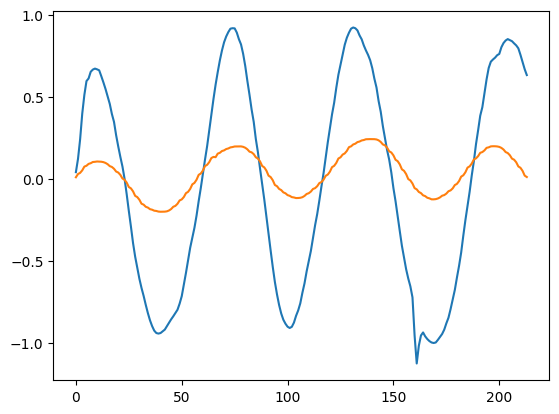

In [26]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

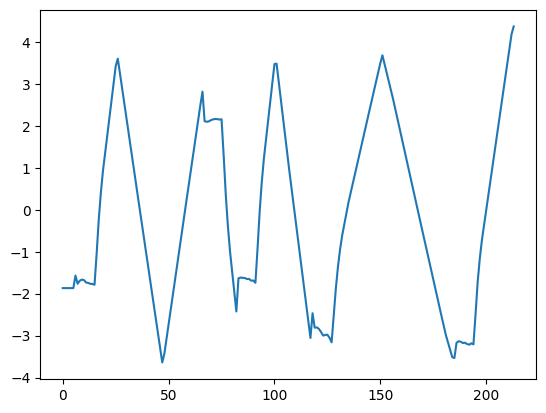

In [27]:
plt.plot(obs_buffer[:,12])

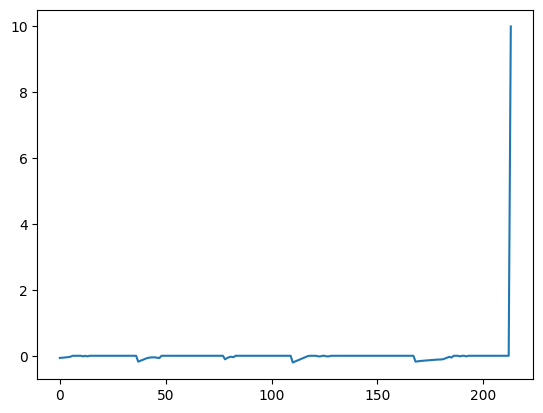

In [28]:
plt.plot(reward_buffer[:])

In [29]:
np.sum(reward_buffer)

np.float64(5.290224437666555)

In [30]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0014002867126464845},
 {'winner': -1,
  'reward_closeness_to_puck': -0.11929960165052605,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0014002867126464845},
 10.0,
 -10.119299601650527)

In [31]:
env.close()

# Human Opponent

In [32]:
env = h_env.HockeyEnv()

In [33]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [34]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [35]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [36]:
env.close()

# Check side consistency

In [37]:
env = h_env.HockeyEnv()

In [38]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [39]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [40]:
obs_buffer.shape

(151767, 18)

In [41]:
np.mean(obs_buffer,axis=0)

array([-2.96973202, -0.00345323,  0.00108053, -0.05136981,  0.00831461,
        0.0033796 ,  2.97172687, -0.00013553, -0.00052673,  0.05783515,
        0.00970243, -0.00003813,  0.01842589,  0.00026477,  0.04293833,
       -0.00521219,  1.08196775,  1.09035561])

In [42]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([ 0.00052422, -0.00992731, -0.00009509,  0.0032507 , -0.00300402,
       -0.0025082 , -0.0005245 ,  0.00982973,  0.00009508, -0.0032613 ,
        0.00299503,  0.00250193,  0.        ,  0.        ,  0.        ,
        0.        , -0.00343755,  0.00342577])

In [43]:
winner_buffer

[1,
 -1,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 -1,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,


In [44]:
np.mean(winner_buffer,axis=0)

np.float64(0.003)

In [45]:
np.std(winner_buffer,axis=0)

np.float64(0.798117159319357)

In [46]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-4350.129345552181), np.float64(-4343.173264404767))

In [47]:
env.close()

# My tests for TD3

In [48]:
#imports needed for TD3
from emre_version.TD3 import TD3
from emre_version.feedforward import Feedforward
from emre_version.memory import Memory

In [49]:
#instance of TD3
td3_agent = TD3(
    observation_space=env.observation_space,
    action_space=env.action_space,
    userconfig={
            # "eps": 0.1,            # Epsilon: noise strength to add to policy
            # "discount": 0.95,
            # "buffer_size": int(1e6),
            # "batch_size": 128,
            # "learning_rate_actor": 0.00001,
            # "learning_rate_critic": 0.0001,
            # "hidden_sizes_actor": [128,128],
            # "hidden_sizes_critic": [128,128,64],
            # "update_target_every": 100,
            # "use_target_net": True,
            # "policy_noise": 0.2,
		    # "noise_clip": 0.5,
            # "policy_freq": 2, 
            # "tau": 0.005
    }
)

# ChatGPT Version

Episode 1: Total Reward = 10.0
Episode 2: Total Reward = 7.60903014342256
Episode 3: Total Reward = -45.565810928144984
Episode 4: Total Reward = 0.0
Episode 5: Total Reward = -54.471104440881106
Episode 6: Total Reward = 0.0
Episode 7: Total Reward = -49.08026866978295
Episode 8: Total Reward = 0.0
Episode 9: Total Reward = -28.550954258713325
Episode 10: Total Reward = 0.0
Evaluation Episode 1: Reward = -29.0019356558153
Evaluation Episode 2: Reward = 0.0
Evaluation Episode 3: Reward = -34.01607560147109
Evaluation Episode 4: Reward = 0.0
Evaluation Episode 5: Reward = -41.005754770466076
Evaluation Episode 6: Reward = 0.0
Evaluation Episode 7: Reward = -36.03179006141087
Evaluation Episode 8: Reward = 0.0
Evaluation Episode 9: Reward = -33.88078920768536
Evaluation Episode 10: Reward = 0.0
Average Reward over 10 episodes: -17.393634529684867


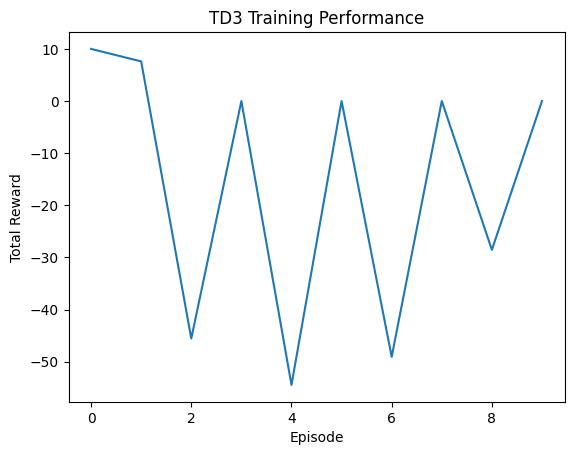

In [50]:
# Training loop for TD3
def train_td3(agent, env, episodes=10, max_steps=1000):
    rewards = []
    for episode in range(episodes):
        obs, _ = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = agent.act(obs)  # TD3 decides action
            next_obs, reward, done, trunc, _ = env.step(action)
            agent.store_transition((obs, action, reward, next_obs, float(done)))
            agent.train()  # Train the TD3 agent
            episode_reward += reward
            obs = next_obs
            if done or trunc:
                break
        rewards.append(episode_reward)
        print(f"Episode {episode + 1}: Total Reward = {episode_reward}")
    return rewards

train_rewards = train_td3(td3_agent, env, episodes=10)

# Evaluation loop for TD3
def evaluate_td3(agent, env, episodes=10, max_steps=1000):
    total_rewards = []
    for episode in range(episodes):
        obs, _ = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = agent.act(obs, eps=0.0)  # Disable exploration during evaluation
            next_obs, reward, done, trunc, _ = env.step(action)
            episode_reward += reward
            obs = next_obs
            if done or trunc:
                break
        total_rewards.append(episode_reward)
        print(f"Evaluation Episode {episode + 1}: Reward = {episode_reward}")
    avg_reward = np.mean(total_rewards)
    print(f"Average Reward over {episodes} episodes: {avg_reward}")
    return avg_reward

evaluate_td3(td3_agent, env, episodes=10)

plt.plot(train_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('TD3 Training Performance')
plt.show()

## Code I copied from above to try to train

In [51]:
env = h_env.HockeyEnv()

In [52]:
o, info = env.reset()
_ = env.render()
player1 = td3_agent
player2 = h_env.BasicOpponent()

In [53]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [54]:
np.mean(obs_buffer,axis=0)

array([-2.39620983,  1.58720072,  0.9530045 ,  0.21801454,  0.39593906,
        0.1813175 ,  2.22140882,  2.62392127, -0.96719469, -0.11872677,
        0.51905857, -0.20431693, -1.04636717, -0.05753207,  0.        ,
        0.        ,  0.        ,  0.        ])

In [55]:
np.std(obs_buffer,axis=0)

array([0.90091204, 0.87432549, 0.20817792, 5.17585438, 5.32673784,
       3.73370376, 1.12635297, 0.60884551, 0.1748496 , 6.41368824,
       1.86737592, 3.00988772, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [56]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [57]:
import pylab as plt

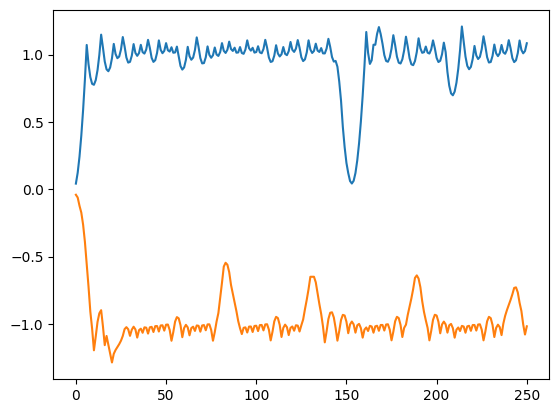

In [58]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

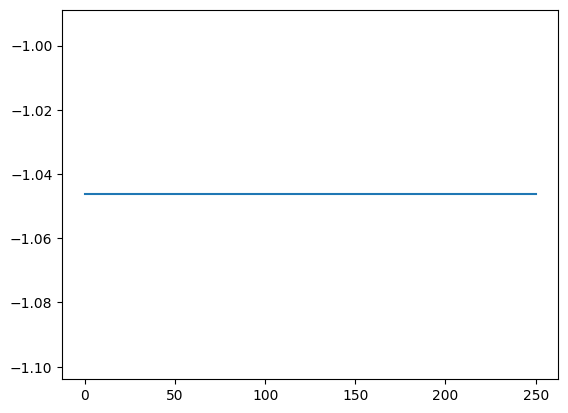

In [59]:
plt.plot(obs_buffer[:,12])

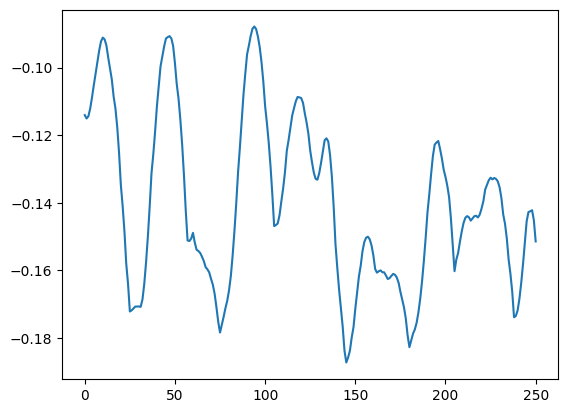

In [60]:
plt.plot(reward_buffer[:])

In [61]:
np.sum(reward_buffer)

np.float64(-35.13478238064866)

In [62]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': -0.15142517323164612,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0},
 -0.15142517323164612,
 0.0)

In [63]:
env.close()

In [71]:
#imports needed for TD3
from emre_version.TD3_alternative import TD3 as TD3_Alternative

In [72]:
#instance of TD3
td3_agent_alternative = TD3_Alternative(
    observation_space=env.observation_space,
    action_space=env.action_space,
    userconfig={
            # "eps": 0.1,            # Epsilon: noise strength to add to policy
            # "discount": 0.95,
            # "buffer_size": int(1e6),
            # "batch_size": 128,
            # "learning_rate_actor": 0.00001,
            # "learning_rate_critic": 0.0001,
            # "hidden_sizes_actor": [128,128],
            # "hidden_sizes_critic": [128,128,64],
            # "update_target_every": 100,
            # "use_target_net": True,
            # "policy_noise": 0.2,
		    # "noise_clip": 0.5,
            # "policy_freq": 2, 
            # "tau": 0.005
    }
)

In [73]:


train_rewards_alternative = train_td3(td3_agent_alternative, env, episodes=10)



evaluate_td3(td3_agent_alternative, env, episodes=10)

plt.plot(train_rewards_alternative)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('TD3 Training Performance')
plt.show()

UnboundLocalError: cannot access local variable 'actor_loss' where it is not associated with a value